# Data-Analysis of Arxiv website research papers - v1.0

This python book is created for Python2.x version programmers.Published on 5-March-2017.

In this book we have total 3 section.

* Section 1: **Fetching meta data from Arxiv.org**
* Section 2: **Cleaning and Analysis of data with visualization of patterns**
* Section 3: **Downloading research all research paper(optional if any want to download)**

Created by: 

* 1) Neel Shah - Know about him more:  [neelshah18.github.io](https://neelshah18.github.io/) | [Linkedin](https://www.linkedin.com/in/neel-shah-7b5495104/) | [GitHub](https://github.com/NeelShah18) | Email:neelknightme@gmail.com

Special thanks to :

* 1) Malaikannan Sankarasubbu - Know about him more:  [Linkedin](https://www.linkedin.com/in/malaikannan/) | [GitHub](href="https://github.com/malaikannan)

* 2) Dr. Jacob Minz - Know about him more:  [Linkedin](https://www.linkedin.com/in/jacob-minz-16762a3/) | [GitHub](https://github.com/jrminz)

* 3) Anirban Santara - Know about him more:  [Linkedin](https://www.linkedin.com/in/anirbansantara/) | [GitHub](https://github.com/Santara)

If you have any question, problem to run this code, suggetion or feedback please feel free to mail Neel Shah. We will try to contact you as soon as possible.

** Warning: This code is implemented using 3.6+version with latest tool available at that time so please check the compatibility before running it.**

#### Question: What is arxiv.org ? 

arXiv is an e-print service in the fields of physics, mathematics, computer science, quantitative biology, quantitative finance and statistics. Submissions to arXiv should conform to Cornell University academic standards. arXiv is owned and operated by Cornell University, a private not-for-profit educational institution. arXiv is funded by Cornell University Library, the Simons Foundation and by the member institutions. [1](https://arxiv.org/)

#### What data-analysis are we doing?

We are doing this analysis for [IDLI](http://idli.group/) group. And analysis was done specially for Machine Learning, Deep Learning and Artificial Intelligence and related field only. We use around 24,000+ research paper dataset for data analysis. 

#### What to except from this data-analysis?

We are giving 5 types of pattern from this data. Which help researcher's who are in ML, DL or AI field. All pattern code are available free.

** I try my best to use default library for data analysis so anyone who is not from this field can use this without difficulty ** 


## Section 1: Fetching meta data from Arxiv.org and storing in database

** I already download all data put in this folder, so you don't need to download it to reproduce this result. You need to change the path of the database **


- Below code download meta data from arvix python API by parsing query and getting XML response for metadata. You can change the query as you want. You also can change the number of metadata download of papers, We findout that their are around 26000 pages available for Machine learning, Deep learning and Artificial Intelligence related field. So we dowload around 26,000 meta data.

**Please, note arxiv have rate limit so you can download certain number of papers per day. Right now limit is 10,000 for further information please read [this link](https://arxiv.org/help/api/index).**

**To contruct the query and search for specific papers, I encourage to read [this link](https://arxiv.org/help/api/user-manual).**

**To edit this code, Please read all the comment in the code carefully and change code as per requirement.(we assume you have basic knowledge of urllib,feedparser and sqllite)**

Note:

- What the data you get is describe at this link . Please read it. [link](https://arxiv.org/help/api/user-manual).**

In [ ]:
import urllib.request
import feedparser
import sqlite3
import time

# Base api query url
base_url = 'http://export.arxiv.org/api/query?';
sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()

# Search parameters
search_query = 'cat:cs.CV+OR+cat:cs.AI+OR+cat:cs.LG+OR+cat:cs.CL+OR+cat:cs.NE+OR+cat:stat.ML' # search for CV,CL,AI,LG,NE,ML field papers
start = 0                     
# retreive the first 1000 results
max_results = 1000
count = 0
fail_count = 0
while start < 24000:
    time.sleep(5)
    query = 'search_query=%s&start=%i&max_results=%i' % (search_query,start,max_results)
    start = start + 1000

    # Opensearch metadata such as totalResults, startIndex, 
    # and itemsPerPage live in the opensearch namespase.
    # Some entry metadata lives in the arXiv namespace.
    # This is a hack to expose both of these namespaces in
    # feedparser v4.1
    feedparser._FeedParserMixin.namespaces['http://a9.com/-/spec/opensearch/1.1/'] = 'opensearch'
    feedparser._FeedParserMixin.namespaces['http://arxiv.org/schemas/atom'] = 'arxiv'

    # perform a GET request using the base_url and query
    response = urllib.request.urlopen(base_url+query).read()

    # parse the response using feedparser
    feed = feedparser.parse(response)

    # print out feed information
    print('Feed title: %s' % feed.feed.title)
    print('Feed last updated: %s' % feed.feed.updated)

    # print opensearch metadata
    # print('totalResults for this query: %s' % feed.feed.opensearch_totalresults)
    # print('itemsPerPage for this query: %s' % feed.feed.opensearch_itemsperpage)
    # print('startIndex for this query: %s'   % feed.feed.opensearch_startindex)

    # Run through each entry, and print out information
    for entry in feed.entries:
        print('e-print metadata')
        print('arxiv-id: %s' % entry.id.split('/abs/')[-1])
        c1_data = "'"+str(entry.id.split('/abs/')[-1])+"'"
        print('Published: %s' % entry.published)
        c2_data = "'"+str(entry.published)+"'"
        print('Title:  %s' % entry.title)
        old_title = str(entry.title)
        new_title = old_title.replace("'","")
        c3_data = "'"+str(new_title)+"'"
    
        # feedparser v4.1 only grabs the first author
        author_string = entry.author
    
        # grab the affiliation in <arxiv:affiliation> if present
        # - this will only grab the first affiliation encountered
        #   (the first affiliation for the first author)
        # Please email the list with a way to get all of this information!
        try:
            author_string += ' (%s)' % entry.arxiv_affiliation
        except AttributeError:
            pass
    
        print('Last Author:  %s' % author_string)
    
        # feedparser v5.0.1 correctly handles multiple authors, print them all
        try:
            old_author_list = ', '.join(author.name for author in entry.authors)
            new_author_list = old_author_list.replace("'","")
            print('Authors:  %s' % ', '.join(author.name for author in entry.authors))
            c4_data = "'"+str(new_author_list)+"'"
        except AttributeError:
            pass

        # get the links to the abs page and pdf for this e-print
        for link in entry.links:
            if link.rel == 'alternate':
                print('abs page link: %s' % link.href)
            elif link.title == 'pdf':
                print('pdf link: %s' % link.href)
                c5_data = "'"+str(link.href)+"'"
    
        # The journal reference, comments and primary_category sections live under 
        # the arxiv namespace
        try:
            journal_ref = entry.arxiv_journal_ref
        except AttributeError:
            journal_ref = 'No journal ref found'
        print('Journal reference: %s' % journal_ref)
        c6_data = "'"+str(journal_ref)+"'"
        
        try:
            comment = entry.arxiv_comment
        except AttributeError:
            comment = 'No comment found'
        # print('Comments: %s' % comment)
        c7_data = "'"+str('none')+"'"
        
        # Since the <arxiv:primary_category> element has no data, only
        # attributes, feedparser does not store anything inside
        # entry.arxiv_primary_category
        # This is a dirty hack to get the primary_category, just take the
        # first element in entry.tags.  If anyone knows a better way to do
        # this, please email the list!
        print('Primary Category: %s' % entry.tags[0]['term'])
        c8_data = "'"+str(entry.tags[0]['term'])+"'"
        
        # Lets get all the categories
        all_categories = [t['term'] for t in entry.tags]
        print('All Categories: %s' % (', ').join(all_categories))
    
        # The abstract is in the <summary> element
        # print('Abstract: %s' %  entry.summary)
        c9_data = "'"+str('Summary')+"'"
        # primary key of database
        c0_data = "'"+str(count)+"'"
        try:
            c.execute("INSERT INTO arxiv_data VALUES ({c1},{c2},{c3},{c4},{c5},{c6},{c7},{c8},{c9})".format(c1=c1_data,c2=c2_data,c3=c3_data,c4=c4_data,c5=c5_data,c6=c6_data,c7=c7_data,c8=c8_data,c9=c9_data))
            conn.commit()
            print('-------------Data is stored in database-----------------')
            count += 1
        except:
            fail_count += 1
            pass
        
        
        
conn.close()        
print('Fail count: '+str(fail_count))
print('Connection is closed!')

#### Below code and it's output give the simple example what is the data stored in database.

In [9]:
import sqlite3

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
data=[]
c.execute("SELECT * FROM arxiv_data LIMIT 5")
data = c.fetchall()
for line in data:
    print(line)
conn.close()

(0, '1603.03827v1', '2016-03-12T00:02:51Z', 'Sequential Short-Text Classification with Recurrent and Convolutional\n  Neural Networks', 'Ji Young Lee, Franck Dernoncourt', 'http://arxiv.org/pdf/1603.03827v1', 'No journal ref found', 'none', 'cs.CL', 'Summary')
(1, '1606.00776v2', '2016-06-02T17:37:31Z', 'Multiresolution Recurrent Neural Networks: An Application to Dialogue\n  Response Generation', 'Iulian Vlad Serban, Tim Klinger, Gerald Tesauro, Kartik Talamadupula, Bowen Zhou, Yoshua Bengio, Aaron Courville', 'http://arxiv.org/pdf/1606.00776v2', 'No journal ref found', 'none', 'cs.CL', 'Summary')
(2, '1504.00923v1', '2015-04-03T19:57:06Z', 'A Unified Deep Neural Network for Speaker and Language Recognition', 'Fred Richardson, Douglas Reynolds, Najim Dehak', 'http://arxiv.org/pdf/1504.00923v1', 'No journal ref found', 'none', 'cs.CL', 'Summary')
(3, '1609.06492v1', '2016-09-21T10:52:03Z', 'Document Image Coding and Clustering for Script Discrimination', 'Darko Brodic, Alessia Amelio, 

## Section 2: data analysis

In this section we start do data analysis.Below is the different area which are included in data analysis:

* Computer Vision and Pattern Recognition
* Artificial Intelligence
* Learning
* Computation and Language
* Neural and Evolutionary Computing
* Machine Learning

** Below is the list of patterns we find from this dataset.**

* 1) Publish papers in different area during 2010.
* 2) Publish papers in different area during 2011.
* 3) Publish papers in different area during 2012.
* 4) Publish papers in different area during 2013.
* 5) Publish papers in different area during 2014.
* 6) Publish papers in different area during 2015.
* 7) Publish papers in different area during 2016.
* 8) Trend analysis from 2010 to 2016 in different field.
* 9) Top 10 author for arxiv publiction from 1992 to 2017

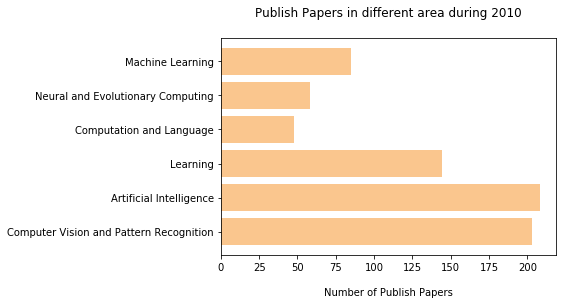

In [7]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT * FROM `freq_data`;")
publish_date = c.fetchall()
s = str(publish_date[0])
s1 = s[6:len(s)-1]
c1,c2,c3,c4,c5,c6  = s1.split(",")


objects = ('Computer Vision and Pattern Recognition', 'Artificial Intelligence', 'Learning', 'Computation and Language', 'Neural and Evolutionary Computing', 'Machine Learning')
y_pos = np.arange(len(objects))
performance = [int(c1),int(c2),int(c3),int(c4),int(c5),int(c6)]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color='#F78F1E')
plt.yticks(y_pos, objects)
plt.xlabel('\nNumber of Publish Papers')
plt.title('Publish Papers in different area during 2010\n')
 
plt.show()



conn.close()

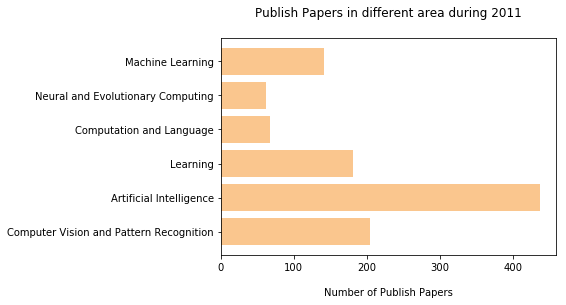

In [6]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT * FROM `freq_data`;")
publish_date = c.fetchall()
s = str(publish_date[1])
s1 = s[6:len(s)-1]
c1,c2,c3,c4,c5,c6  = s1.split(",")


objects = ('Computer Vision and Pattern Recognition', 'Artificial Intelligence', 'Learning', 'Computation and Language', 'Neural and Evolutionary Computing', 'Machine Learning')
y_pos = np.arange(len(objects))
performance = [int(c1),int(c2),int(c3),int(c4),int(c5),int(c6)]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color='#F78F1E')
plt.yticks(y_pos, objects)
plt.xlabel('\nNumber of Publish Papers')
plt.title('Publish Papers in different area during 2011\n')
 
plt.show()



conn.close()

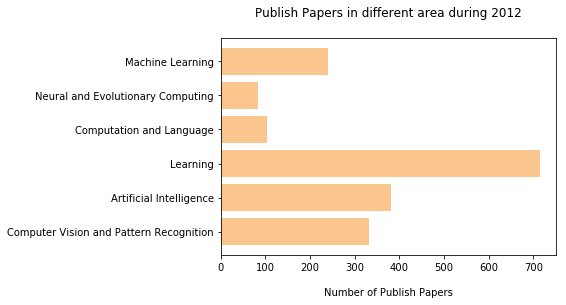

In [5]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT * FROM `freq_data`;")
publish_date = c.fetchall()
s = str(publish_date[2])
s1 = s[6:len(s)-1]
c1,c2,c3,c4,c5,c6  = s1.split(",")


objects = ('Computer Vision and Pattern Recognition', 'Artificial Intelligence', 'Learning', 'Computation and Language', 'Neural and Evolutionary Computing', 'Machine Learning')
y_pos = np.arange(len(objects))
performance = [int(c1),int(c2),int(c3),int(c4),int(c5),int(c6)]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color='#F78F1E')
plt.yticks(y_pos, objects)
plt.xlabel('\nNumber of Publish Papers')
plt.title('Publish Papers in different area during 2012\n')
 
plt.show()



conn.close()

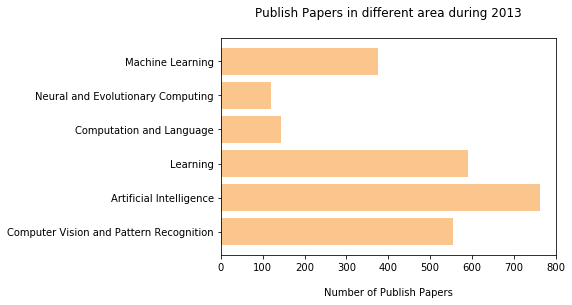

In [2]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT * FROM `freq_data`;")
publish_date = c.fetchall()
s = str(publish_date[3])
s1 = s[6:len(s)-1]
c1,c2,c3,c4,c5,c6  = s1.split(",")



objects = ('Computer Vision and Pattern Recognition', 'Artificial Intelligence', 'Learning', 'Computation and Language', 'Neural and Evolutionary Computing', 'Machine Learning')
y_pos = np.arange(len(objects))
performance = [int(c1),int(c2),int(c3),int(c4),int(c5),int(c6)]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color='#F78F1E')
plt.yticks(y_pos, objects)
plt.xlabel('\nNumber of Publish Papers')
plt.title('Publish Papers in different area during 2013\n')
 
plt.show()



conn.close()

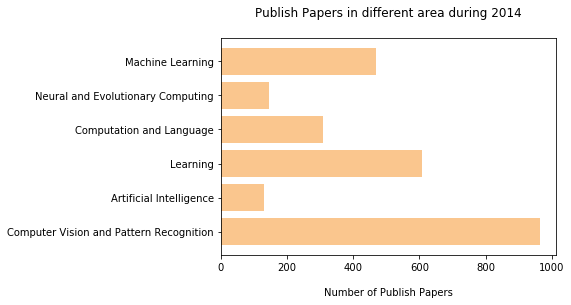

In [1]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT * FROM `freq_data`;")
publish_date = c.fetchall()
s = str(publish_date[4])
s1 = s[6:len(s)-1]
c1,c2,c3,c4,c5,c6  = s1.split(",")



objects = ('Computer Vision and Pattern Recognition', 'Artificial Intelligence', 'Learning', 'Computation and Language', 'Neural and Evolutionary Computing', 'Machine Learning')
y_pos = np.arange(len(objects))
performance = [int(c1),int(c2),int(c3),int(c4),int(c5),int(c6)]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color='#F78F1E')
plt.yticks(y_pos, objects)
plt.xlabel('\nNumber of Publish Papers')
plt.title('Publish Papers in different area during 2014\n')
 
plt.show()



conn.close()

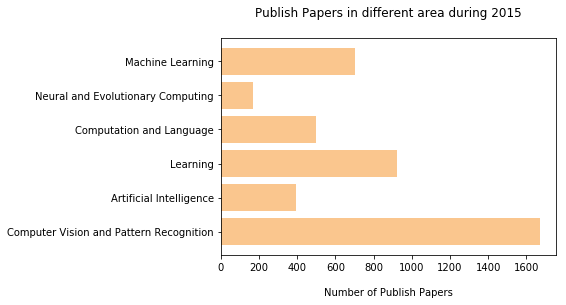

In [3]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT * FROM `freq_data`;")
publish_date = c.fetchall()
s = str(publish_date[5])
s1 = s[6:len(s)-1]
c1,c2,c3,c4,c5,c6  = s1.split(",")



objects = ('Computer Vision and Pattern Recognition', 'Artificial Intelligence', 'Learning', 'Computation and Language', 'Neural and Evolutionary Computing', 'Machine Learning')
y_pos = np.arange(len(objects))
performance = [int(c1),int(c2),int(c3),int(c4),int(c5),int(c6)]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color='#F78F1E')
plt.yticks(y_pos, objects)
plt.xlabel('\nNumber of Publish Papers')
plt.title('Publish Papers in different area during 2015\n')
 
plt.show()



conn.close()

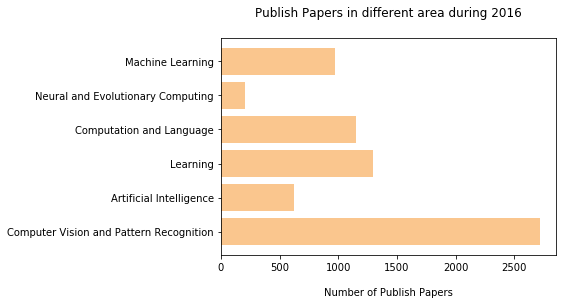

In [4]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT * FROM `freq_data`;")
publish_date = c.fetchall()
s = str(publish_date[6])
s1 = s[6:len(s)-1]
c1,c2,c3,c4,c5,c6  = s1.split(",")


objects = ('Computer Vision and Pattern Recognition', 'Artificial Intelligence', 'Learning', 'Computation and Language', 'Neural and Evolutionary Computing', 'Machine Learning')
y_pos = np.arange(len(objects))
performance = [int(c1),int(c2),int(c3),int(c4),int(c5),int(c6)]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color='#F78F1E')
plt.yticks(y_pos, objects)
plt.xlabel('\nNumber of Publish Papers')
plt.title('Publish Papers in different area during 2016\n')
 
plt.show()



conn.close()

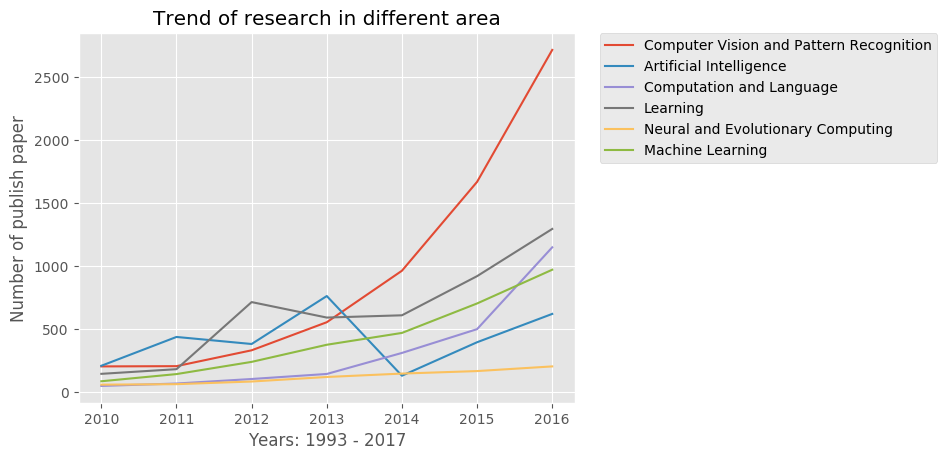

In [13]:
import sqlite3
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
publish_date = []
c.execute("SELECT `publish_date`,`primary_categories` FROM `arxiv_data` ORDER BY `_rowid_` ASC LIMIT 0, 50000;")
publish_date = c.fetchall()
text = str(publish_date[0])
conn.close()
count = 0 


data_CV = {}
data_AI = {}
data_LG = {}
data_CL = {}
data_NE = {}
data_ML = {}

y_CV = []
y_AI = []
y_LG = []
y_CL = []
y_NE = []
y_ML = []

for data in publish_date:
    text = str(data)
    year = text[2:6] 
    field = text[-4:-2] 
    if field == 'CV':
        try:
            data_CV[year] = int(data_CV[year]) + 1
        except:
            data_CV[year] = 1
            pass
    if field == 'AI':
        try:
            data_AI[year] = int(data_AI[year]) + 1
        except:
            data_AI[year] = 1
            pass
    if field == 'LG':
        try:
            data_LG[year] = int(data_LG[year]) + 1
        except:
            data_LG[year] = 1
            pass
    if field == 'CL':
        try:
            data_CL[year] = int(data_CL[year]) + 1
        except:
            data_CL[year] = 1
            pass
    if field == 'NE':
        try:
            data_NE[year] = int(data_NE[year]) + 1
        except:
            data_NE[year] = 1
            pass
    if field == 'ML':
        try:
            data_ML[year] = int(data_ML[year]) + 1
        except:
            data_ML[year] = 1
            pass

x_xix = []        
        
x = 2010
zero = 0
while int(x) < 2017:
    try:
        #print(x)
        y_CV.append(data_CV[str(x)])
        #print(data_CV[x])
    except:
        y_CV.append(int(zero))
        pass
    try:
        #print(x)
        y_AI.append(data_AI[str(x)])
        #print(data_CV[x])
    except:
        y_AI.append(int(zero))
        pass
    try:
        #print(x)
        y_CL.append(data_CL[str(x)])
        #print(data_CV[x])
    except:
        y_CL.append(int(zero))
        pass
    try:
        #print(x)
        y_LG.append(data_LG[str(x)])
        #print(data_CV[x])
    except:
        y_LG.append(int(zero))
        pass
    try:
        #print(x)
        y_NE.append(data_NE[str(x)])
        #print(data_CV[x])
    except:
        y_NE.append(int(zero))
        pass
    try:
        #print(x)
        y_ML.append(data_ML[str(x)])
        #print(data_CV[x])
    except:
        y_ML.append(int(zero))
        pass
    
    x_xix.append(int(x))
    x += 1


style.use('ggplot')
plt.plot(x_xix,y_CV,label="Computer Vision and Pattern Recognition")

plt.plot(x_xix,y_AI,label="Artificial Intelligence")
plt.plot(x_xix,y_CL,label="Computation and Language")
plt.plot(x_xix,y_LG,label="Learning")
plt.plot(x_xix,y_NE,label="Neural and Evolutionary Computing")
plt.plot(x_xix,y_ML,label="Machine Learning")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Trend of research in different area')
plt.ylabel('Number of publish paper')
plt.xlabel('Years: 1993 - 2017')

plt.show()


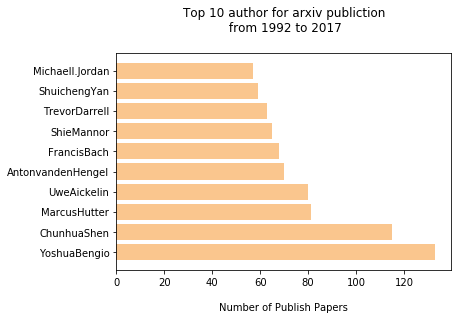

In [8]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np
import operator

data = []
author_dic = {}
sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT `publish_date`,`authors` FROM `arxiv_data`;")
data = c.fetchall()
#print(data[0])
text = str(data[0])
#print(text[2:6])
#print(text[26:len(text)-2])
#print(len(data))
x = 0


while x < len(data):
    text = str(data[x])
    author_list = (text[26:len(text)-2].replace(" ", "")).split(",")
    for single_author in author_list:
        try:
            author_dic[str(single_author)] = int(author_dic[str(single_author)]) + 1
        except:
            author_dic[str(single_author)] = 1
            pass
    x += 1
    #print(author_list)

#print(author_dic)    
rev_author_dic = {v: k for k, v in author_dic.items()}
#print(rev_author_dic)
sort_rev_author_dic=sorted(rev_author_dic.items(), key=operator.itemgetter(0),reverse=True)
#print(sort_rev_author_dic[0][0])
#print(sort_rev_author_dic[0][1])

objects = (str(sort_rev_author_dic[0][1]),str(sort_rev_author_dic[1][1]),str(sort_rev_author_dic[2][1]),str(sort_rev_author_dic[3][1]),str(sort_rev_author_dic[4][1]),str(sort_rev_author_dic[5][1]),str(sort_rev_author_dic[6][1]),str(sort_rev_author_dic[7][1]),str(sort_rev_author_dic[8][1]),str(sort_rev_author_dic[9][1]))
y_pos = np.arange(len(objects))
performance = [int(sort_rev_author_dic[0][0]),int(sort_rev_author_dic[1][0]),int(sort_rev_author_dic[2][0]),int(sort_rev_author_dic[3][0]),int(sort_rev_author_dic[4][0]),int(sort_rev_author_dic[5][0]),int(sort_rev_author_dic[6][0]),int(sort_rev_author_dic[7][0]),int(sort_rev_author_dic[8][0]),int(sort_rev_author_dic[9][0])]
 
plt.barh(y_pos, performance, align='center', alpha=0.5,color='#F78F1E')
plt.yticks(y_pos, objects)
plt.xlabel('\nNumber of Publish Papers')
plt.title('Top 10 author for arxiv publiction\n from 1992 to 2017\n')
 
plt.show()

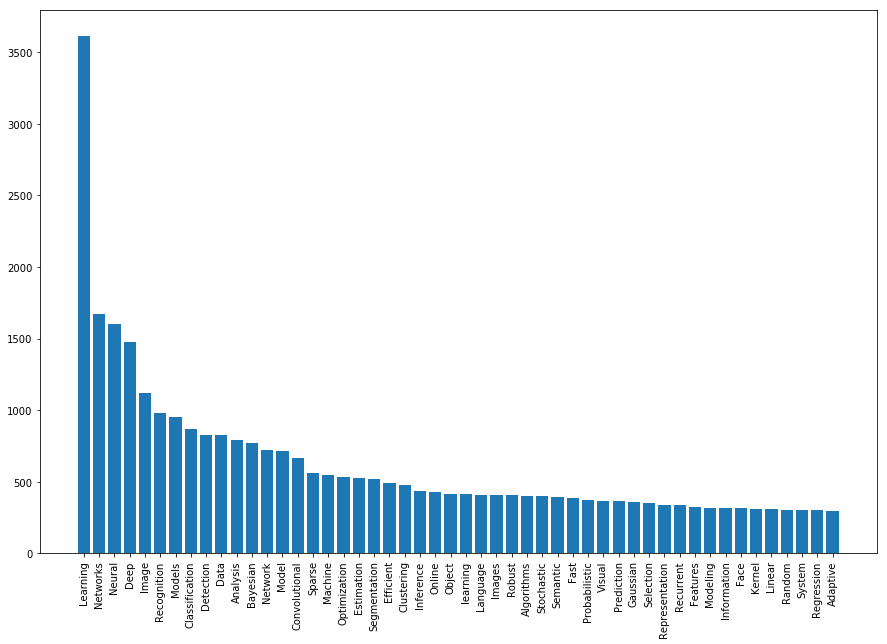

In [2]:
import sqlite3
import matplotlib.pyplot as plt
import operator

data = []
author_dic = {}
sqlite_database = '/home/neel/arxiv_data/test.sqlite'
conn = sqlite3.connect(sqlite_database)
c = conn.cursor()
c.execute("SELECT `publish_date`,`title` FROM `arxiv_data`;")
data = c.fetchall()
#print(data[0])
#text = str(data[0])
#print(text[2:6])
#print(text[26:len(text)-2])
#print((text[26:len(text)-2].replace("\\n", "")).split(" "))
conn.close()

word_dic = {}

x = 0


while x < len(data):
    text = str(data[x])
    word_list = (text[26:len(text)-2].replace("\\n", "")).split(" ")
    for single_word in word_list:
        try:
            word_dic[str(single_word)] = int(word_dic[str(single_word)]) + 1
        except:
            word_dic[str(single_word)] = 1
            pass
    x += 1

#print(word_dic)
#print('************************************************************')
lis_1 = sorted(word_dic, key=word_dic.get, reverse=True)
#print(lis_1)
#print(lis_1[1])
#print(word_dic[str(lis_1[1])])
lis_extra_word=['Methods','Method','Using','for','of','and','in','with','A','the','to','a','on','using','from','data','by','via','An','The','model','Approach','based','Algorithm','On','Feature','Based']

draw_word_dic = {}
z = 1
count = 0

while count < 50:
    if str(lis_1[z]) not in lis_extra_word:
        draw_word_dic[str(lis_1[z])] = (word_dic[str(lis_1[z])])
        #print(str(lis_1[z])+" --> "+str(word_dic[str(lis_1[z])]))
        count += 1
    
    z += 1

#print(draw_word_dic)
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print "Current size:", fig_size
 
# Set figure width to 20 and height to 12
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.bar(range(len(draw_word_dic)),draw_word_dic.values(),align='center')
plt.xticks(range(len(draw_word_dic)),list(draw_word_dic.keys()),rotation=90)

plt.show()